In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import roc_auc_score
from datetime import date

In [2]:
data = pd.read_csv('Combined_News_DJIA.csv')
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [3]:
train = data[data['Date'] < '2016-03-01']
test = data[data['Date'] > '2016-03-01']
print(len(test))
print(len(train))

86
1902


In [4]:
#选取从第二列到最后一列为X_train,
X_train = train[train.columns[2:]]

In [5]:
X_train[-10:]

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1892,Faced with a cash shortage in its so-called ca...,According to NASA data this January was the wa...,US stealth jets flying over S. Korea amid N. K...,A piece of Mozart music considered lost for mo...,Iranian Heavy Metal Band 'Confess' Reportedly ...,Paedophile who led child sex grooming ring usi...,"800 Bataclan survivors get to ""finish the conc...",Eagles of Death Metal perform again in Paris t...,"In a first, new Egyptian schoolbook teaches pe...",Nine out of 10 Britons on modest incomes under...,...,Germany will normalize ties with Iran after it...,China sends missiles to contested South China ...,Turkey's Erdogan: no intent to stop retaliator...,French ex-President Nicolas Sarkozy has been p...,Iran invites Indian investment in projects wor...,Iranian banks reconnected to global payments n...,Saudi Arabia Launches unprecedented Military E...,"Hong Kongs popular, lucrative horror movie abo...",Russian vodka exports slump 40% because of san...,The overconsumption of meat will inevitably pu...
1893,Colombian prison drain pipes yield over 100 di...,Scientists warn of coming global disaster beca...,Blast hits Ankara military building,ISIS beheads 15-year-old Iraqi boy for listeni...,N. Korea prepares for terror attacks on S. Kor...,"Huge explosion hits Turkish Centre, Stockholm,...",Fast-growing tumbleweed called hairy panic blo...,New LSE report recommends 'War on Drugs' is re...,Obama to travel to Cuba President Barack Obama...,Vatican says abortion is 'illegitimate respons...,...,Six soldiers killed in southeast Turkey bomb a...,Swine flu: Three hospital wards closed in Leic...,Pentagon: North Korean special forces 'highly ...,Lockheed Martin ready to manufacture F-16 jets...,Ankara blast: Turkey PM says Syria Kurds to blame,"Venezuela president raises fuel price by 6,000...",El Nio has passed peak strength but impacts wi...,Explosion hits another Turkish military convoy...,Pakistans parliament becomes first in world to...,Cash for Life: Guaranteed Annual Income Gainin...
1894,Obama Going to Cuba; First Visit by U.S. Presi...,David Cameron blocks compulsory sex education ...,Uganda shuts down social media; candidates arr...,Japanese TV anchors lose their jobs for lack o...,Cairo court sentences 4-year-old boy to life i...,Finland starts non-stop flights from Helsinki ...,Jerusalems Zion Square to be renamed for teen ...,Ocean levels in the Philippines rising at 5 ti...,Pope: Bishops Who Reassign Suspect Pedophiles ...,The Canadian government on Thursday delayed fo...,...,Seouls spy service says North Korea preparing ...,"On the Run from the Islamic State, Assyrians A...",U.S. Spurns Turkey Demand to Cut Kurdish Ties ...,Isis sending children to die at unprecedented ...,The Hubble Space Telescope has given scientist...,U.S. stationing tanks and artillery in classif...,First known sexual transmission of Zika virus ...,Colombias top cop resigns amid male prostituti...,Kurds Warn Turkey of Big War With Russia If Tr...,UN: Hamas tunnel threats not helpful for Gaza ...
1895,Britain will vote on whether to remain in the ...,Venezuelans face a 6000% hike in gasoline pric...,ISIS Terrorist Cell Dismantled in Morocco 'Pla...,Warming waters in the Atlantic and Pacific oce...,Kurdish militant group claims responsibility f...,First case of Zika virus confirmed in Canada,Russia warns Assad on vow to retake all of Syria,The German government has asked its intelligen...,Germany migrant bus surrounded by protesters,"500,000 Sign Petition Calling For National Ani...",...,Scientists studying mysterious boiling river s...,Hollande's Attack On 35-Hour Workweek Angers F...,Islamic State faces new trouble in Fallujah as...,Arabic Version of Saturday Night Live Hits the...,Abbas's Fatah declares would-be attacker a 'he...,"3,000-Year-Old Wheel Dug up from Mud in the UK",South Africa Confirms First Zika Virus Case,Stanford scient

In [6]:
#自己定义语料库：将选中的每条新闻 -> 单独的句子,集合在一起，长度为1611*25=40275个句子, 用flatten()把多维数组变为一维，默认按行
corpus = X_train.values.flatten().astype(str)
corpus[-10:]

array(['Migrants break down Macedonia fence on Greek border',
       'France: Rioting Breaks Out as Country Begins Clearing Refugee Camp in Calais, Officials Say',
       'China deletes Weibo account of critic of President Xi Jinping',
       'The Iraqi government and the US embassy in Baghdad have both issued urgent warnings about the possibility of the Mosul dam collapsing and sending a 20-metre-high flash flood coursing down the river Tigris, putting more than a million people at risk.',
       'Cologne Airport evacuated after major security alert',
       'Right-to-die report will call for prior consent in dementia cases.The Supreme Court ruled last year that the century-old law banning physician-assisted death was unconstitutional and that Canadians with unbearable and irremediable suffering could be eligible to end their life with a doctors aid.',
       'Russian TV Silent Over Child Killed by Nanny in Moscow: The channels themselves decided to not show crazy people, Peskov was q

In [7]:
#【划分X_train】取出训练集, 一共1611行，每行用[xx,xx,xx，..] 25条XX表示里面的新闻内容，array格式
X_train = X_train.values.astype(str)
X_train

array([['b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"',
        "b'BREAKING: Musharraf to be impeached.'",
        "b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)'",
        ...,
        'b\'Indian shoe manufactory  - And again in a series of "you do not like your work?"\'',
        "b'Visitors Suffering from Mental Illnesses Banned from Olympics'",
        'b"No Help for Mexico\'s Kidnapping Surge"'],
       ["b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'",
        "b'Bush puts foot down on Georgian conflict'",
        'b"Jewish Georgian minister: Thanks to Israeli training, we\'re fending off Russia "',
        ...,
        "b'Perhaps *the* question about the Georgia - Russia conflict '",
        "b'Russia is so much better at war'",
        'b"So this is what it\'s come to: trading sex for food."'],
       ["b'Remember that adorable 9-year-old who sang at the o

In [8]:
#对每一行，把25条内容合并为一条, X_train现在每行是由25条新闻组成的一个句子
X_train = np.array([' '.join(x) for x in X_train])
X_train

array(['b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Ru

In [9]:
#【划分X_test】
X_test = test[test.columns[2:]]
X_test = X_test.values.astype(str)
X_test = np.array([' '.join(x) for x in X_test])


In [10]:
#【划分y_train】
y_train = train['Label'].values
#【划分y_test】
y_test = test['Label'].values

In [11]:
y_train

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [12]:
y_test

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [13]:
#把语料corpus（40275句新闻）打印前两个出来看看, 打印前2个X_train出来看看
corpus[:2]


array(['b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"',
       "b'BREAKING: Musharraf to be impeached.'"], dtype='<U312')

In [14]:
#2）分词操作： 把句子分词nltk.tokenize， 现在语料库都是单词，X_train中现在25条新闻组成的句子的分词，
from nltk.tokenize import word_tokenize
corpus = [word_tokenize(x) for x in corpus]
X_train = [word_tokenize(x) for x in X_train]
X_test = [word_tokenize(x) for x in X_test]

In [15]:
print(corpus[-2:])

[['Chilean', 'Attacked', 'in', 'Poland', 'After', 'Being', 'Mistaken', 'for', 'Arab'], ['Financial', 'cost', 'of', 'major', 'weather', 'events', 'rising', 'for', 'Canadian', 'taxpayers.The', 'costs', 'related', 'to', 'cleaning', 'up', 'devastating', 'floods', ',', 'the', 'carnage', 'from', 'hurricanes', 'and', 'the', 'damage', 'left', 'in', 'the', 'wake', 'of', 'intense', 'winter', 'storms', 'has', 'exploded', 'to', 'nearly', '$', '900', 'million', 'annually']]


In [16]:
#打印出来看下

X_test[:-10]

[['North',
  'Korea',
  'launches',
  'short-range',
  'missiles',
  'into',
  'Sea',
  'of',
  'Japan',
  'hours',
  'after',
  'UN',
  'Sanctions',
  'A',
  'powerful',
  'Pakistani',
  'religious',
  'body',
  'that',
  'advises',
  'the',
  'government',
  'on',
  'the',
  'compatibility',
  'of',
  'laws',
  'with',
  'Islam',
  'on',
  'Thursday',
  'declared',
  'a',
  'new',
  'law',
  'that',
  'criminalizes',
  'violence',
  'against',
  'women',
  'to',
  'be',
  '``',
  'un-Islamic',
  '.',
  "''",
  'Two',
  'of',
  'the',
  'worlds',
  'biggest',
  'coffee',
  'companies',
  ',',
  'Nestl',
  'and',
  'Jacobs',
  'Douwe',
  'Egberts',
  ',',
  'admit',
  'that',
  'beans',
  'from',
  'Brazilian',
  'plantations',
  'using',
  'slave',
  'labour',
  'may',
  'have',
  'ended',
  'up',
  'in',
  'their',
  'coffee',
  'Argentine',
  'Nobel',
  'Prize',
  'winner',
  'to',
  'Obama',
  ':',
  'Do',
  "n't",
  'visit',
  'March',
  '24',
  ',',
  'because',
  'it',
  "'s",
 

In [17]:
# 3） 预处理，打包为一个函数
# •小写化
# •删除停止词
# •删除数字与符号
# •lemma

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# 去除停用词
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [20]:
# 去除数字，正则表达式
import re


def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))

In [21]:
# 特殊符号
def isSymbol(inputString):
    return bool(re.match(r'[^\w]', inputString))

In [22]:
# lemma提取词干
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

In [23]:
# 定义check函数, 检查每一行中的每个单词是否ok
def check(word):
    if word in stop:
        return False
    elif hasNumbers(word) or isSymbol(word):
        return False
    else:
        return True

In [24]:
# 定义预处理函数preprocessing
def preprocessing(sen):
    res = []
    for word in sen:  # 对每一个整体的array数组
        if check(word):  # 对每一行中的每一个单词，如果check(word)返回True
            # 最小化单词，同时去除一些多余的干扰标识
            if len(word)>1:
                word = word.lower().replace("b'", '').replace('b"', '').replace('"', '').replace("'", '').replace("b", '')
            # 进一步提取词干，利用append加入新的数组
                res.append(wordnet_lemmatizer.lemmatize(word))
    return res

In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
# 处理已有的语料，X_train, X_test
corpus = [preprocessing(x) for x in corpus]
X_train = [preprocessing(x) for x in X_train]
X_test = [preprocessing(x) for x in X_test]

In [27]:
#打印出来看看，处理好的数据，格式就是list of list,
print(X_train[0]) #注意这里的不同，而X_train中是把25条新闻组合在一起后再进行分词（基于每天25条新闻分割）
print(corpus[0])  #corpus是以每条新闻计数的，然后在打散(基于每条新闻分割)

['georgia', 'two', 'russian', 'warplane', 'country', 'move', 'rink', 'war', 'reaking', 'musharraf', 'impeached', 'russia', 'today', 'column', 'troop', 'roll', 'south', 'ossetia', 'footage', 'fighting', 'youtue', 'russian', 'tank', 'moving', 'towards', 'capital', 'south', 'ossetia', 'reportedly', 'completely', 'destroyed', 'georgian', 'artillery', 'fire', 'afghan', 'child', 'raped', 'u.n.', 'official', 'say', 'sick', 'three', 'year', 'old', 'raped', 'nothing', 'russian', 'tank', 'entered', 'south', 'ossetia', 'whilst', 'georgia', 'shoot', 'two', 'russian', 'jet', 'reaking', 'georgia', 'invades', 'south', 'ossetia', 'russia', 'warned', 'would', 'intervene', 'so', 'side', 'the', 'comatent', 'trial', 'nothing', 'sham', 'salim', 'haman', 'sentenced', 'year', 'kept', 'longer', 'anyway', 'feel', 'like', 'georgian', 'troop', 'retreat', 's.', 'osettain', 'capital', 'presumaly', 'leaving', 'several', 'hundred', 'people', 'killed', 'video', 'did', 'u.s.', 'prep', 'georgia', 'war', 'russia', 'rice

In [28]:
#4)训练NLP模型
#目前我们获得了干净的数据集合,有了人造的语料库，
#先采用Word2Vec，【此处需要了解下参数内容】，相当于转化为词向量

In [29]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(corpus, size=128, window=5, min_count=5, workers=4)
#打印出来试试, 注意格式问题
model.wv['victory']

array([-0.00717686,  0.30225518, -0.08975377,  0.0728002 , -0.07706696,
        0.06315855, -0.21472842,  0.20789796, -0.00298674,  0.04264635,
       -0.1170501 , -0.12642355,  0.11704305, -0.03034899,  0.07846103,
        0.09680012,  0.24661513, -0.32944003,  0.25709403,  0.27582932,
        0.20234975, -0.2255013 , -0.26268986,  0.00880802,  0.00264408,
       -0.22510438,  0.0481195 ,  0.06294389, -0.02767396,  0.4547255 ,
       -0.05484492,  0.3761969 , -0.39870802, -0.1169091 ,  0.23939565,
       -0.34891504,  0.3068207 ,  0.09257244, -0.10815342,  0.21006423,
        0.3979927 ,  0.40514818,  0.56532186,  0.04839662,  0.15700568,
        0.30606562, -0.3287457 , -0.02757648, -0.25364155,  0.20790754,
       -0.17328809, -0.33905926, -0.12719943,  0.25304085,  0.3151592 ,
       -0.20988481,  0.06193733, -0.15553658,  0.19019686,  0.09254459,
        0.08668661,  0.26802242, -0.4140022 ,  0.23284827,  0.10022511,
        0.03444226,  0.02287598, -0.24175103,  0.4106804 ,  0.13

In [742]:
#5)训练NLP模型完成后，用NLP模型表达我们的X
#我们的vec是基于每个单词的，怎么办呢？由于我们文本本身的量很小，我们可以把所有的单词的vector拿过来取个平均值：
#定义一个函数，输入一个任意word_list,得到他们的平均vector值的方法


In [30]:
#先获取所有的vocabulary,注意此处Genism移除了之前的model.vocab,需要替换为model.wv.voccab
vocab = model.wv.vocab
#得到任意text的vector
def get_vector(word_list):
    #新建全为0的array
    res = np.zeros([128])
    count=0
    for word in word_list:
        if word in vocab:   
            res += model[word]
            count += 1
    return res/count

In [31]:
#KeyError: "word 'impeached' not in vocabulary" 出现错误，这里转换失败
X_train_V = [get_vector(x) for x in X_train]
X_test_V = [get_vector(x) for x in X_test]
X_test_V[-10:]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


[array([-0.12946362,  0.3272195 , -0.08036379,  0.11186463, -0.06400049,
         0.07430585, -0.24802618,  0.23177194,  0.04377096,  0.00585328,
        -0.06372201, -0.08220395,  0.0888566 , -0.05833707,  0.082431  ,
         0.07218861,  0.23853676, -0.46699333,  0.20224589,  0.27481692,
         0.20016596, -0.19173983, -0.2377306 , -0.01860719, -0.00754908,
        -0.18382545,  0.13347562,  0.1091688 , -0.02100263,  0.47559006,
        -0.04014819,  0.25701926, -0.37222384, -0.15647551,  0.20999052,
        -0.31229919,  0.35004899,  0.05896223, -0.13781773,  0.25891913,
         0.35291224,  0.3872235 ,  0.54082595,  0.02903646,  0.17318465,
         0.19886398, -0.26797606, -0.04738319, -0.3146673 ,  0.16561571,
        -0.21739172, -0.3004078 , -0.12557747,  0.2200836 ,  0.22437096,
        -0.12074122,  0.08994136, -0.10170004,  0.13132005,  0.08572868,
         0.08069682,  0.21081897, -0.38459579,  0.2465172 ,  0.0797349 ,
        -0.03776386,  0.13867762, -0.16956094,  0.3

In [ ]:

#6) 建立ML模型
#这里，因为我们128维的每一个值都是连续关系的。不是分裂开考虑的。所以，道理上讲，我们是不太适合用RandomForest这类把每个column当做单独的variable来看的方法。（当然，事实是，你也可以这么用）
#我们来看看比较适合连续函数的方法：SVM

Text(0, 0.5, 'Score')

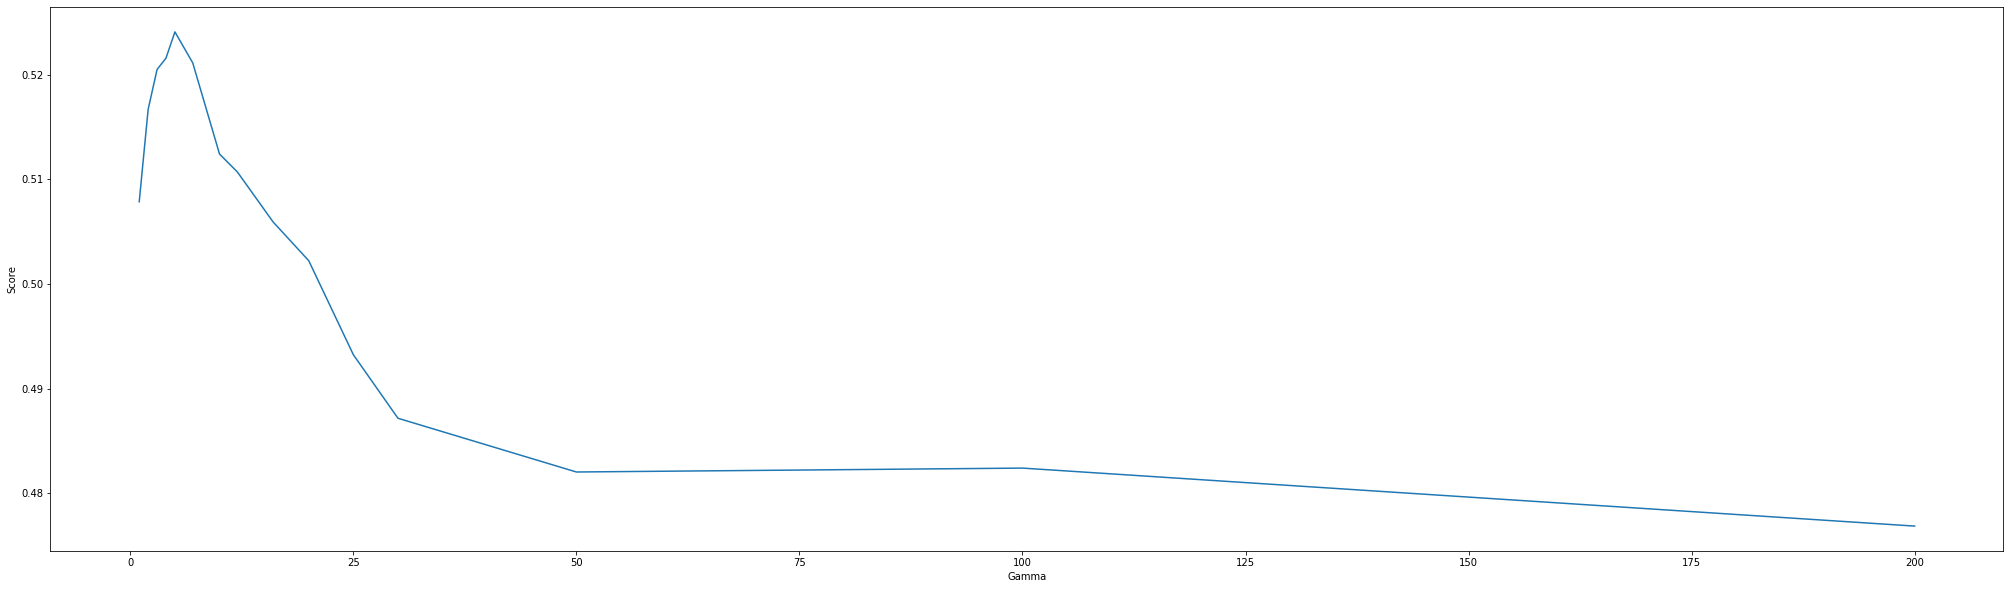

In [32]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

params = [1,2,3,4,5,7,10,12,16,20,25,30,50,100,200]
# params = range(1,100)
test_scores = []
for param in params:
    clf = SVR(gamma = param)
    test_score = cross_val_score(clf,X_train_V, y_train, cv=3, scoring='roc_auc')
    test_scores.append(np.mean(test_score))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(35, 10))
plt.plot(params, test_scores)
plt.xlabel("Gamma")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

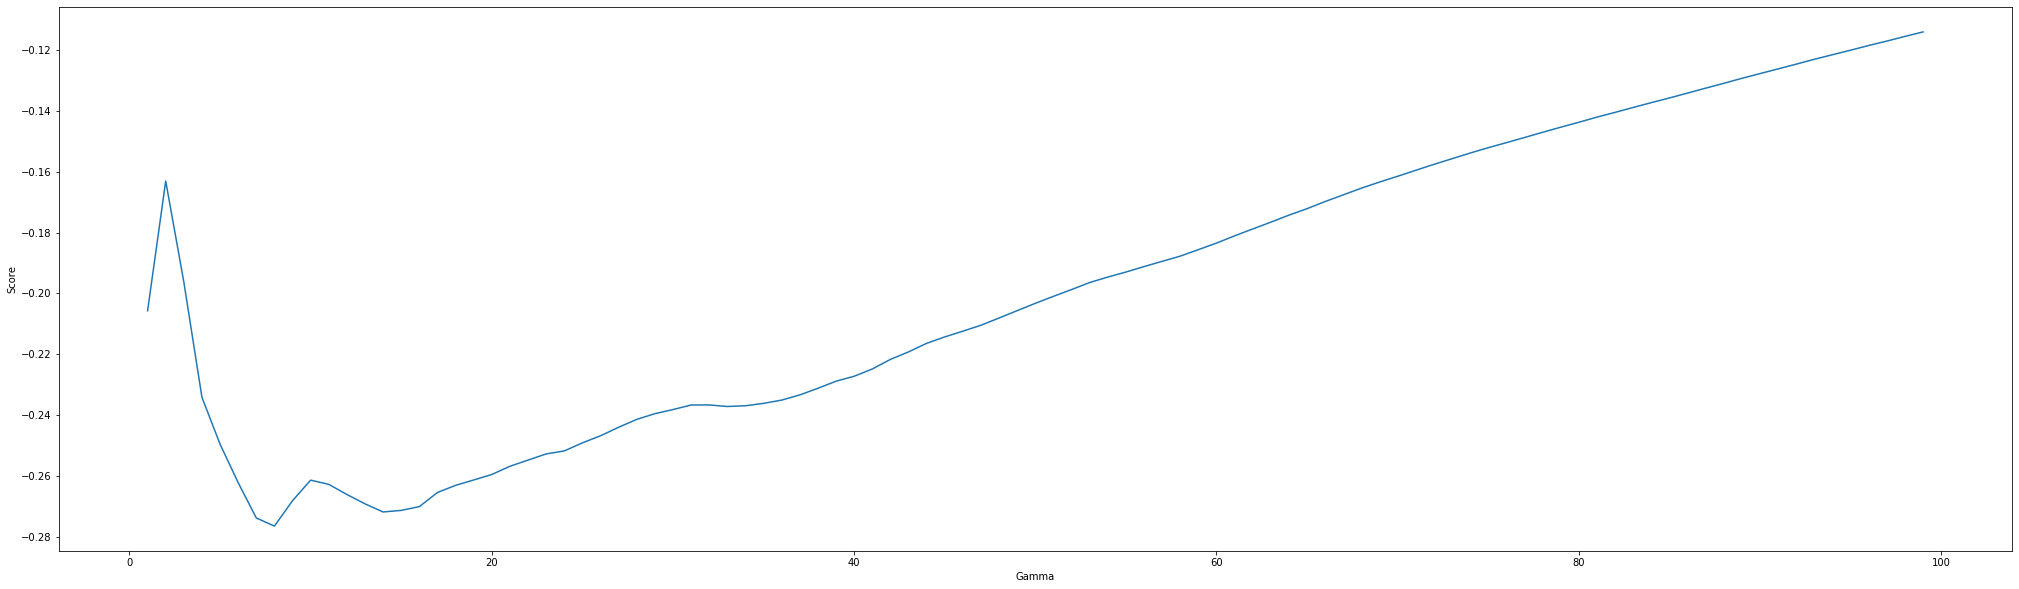

In [33]:
from sklearn.svm import SVR
params = range(1,100)
test_scores = []
for param in params:
    clf = SVR(gamma = param)
    clf.fit(X_train_V, y_train, sample_weight = None)
    clf.predict(X_test_V)
    test_scores.append(clf.score(X_test_V, y_test))
    clf.score(X_test_V, y_test)
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(35, 10))
plt.plot(params, test_scores)
plt.xlabel("Gamma")
plt.ylabel("Score")

In [34]:
clf = SVR(gamma = 100)
clf.fit(X_train_V, y_train, sample_weight = None)
clf.predict(X_test_V)
print(clf.predict(X_test_V)[-10:])
print(y_test[-10:])
clf.score(X_test_V, y_test)


[0.47007306 0.46882233 0.49791765 0.46182085 0.53048157 0.53324957
 0.50624718 0.36866658 0.52487205 0.51185001]
[1 1 0 1 0 0 1 1 1 1]


-0.11268748725997746

In [35]:
from sklearn import datasets, svm
from sklearn.model_selection import cross_val_score
SVC = svm.SVC()
print(cross_val_score(SVC, X_train_V, y_train, cv=5, scoring='accuracy'))  

[0.5328084  0.5328084  0.53157895 0.53157895 0.53421053]


Text(0, 0.5, 'Score')

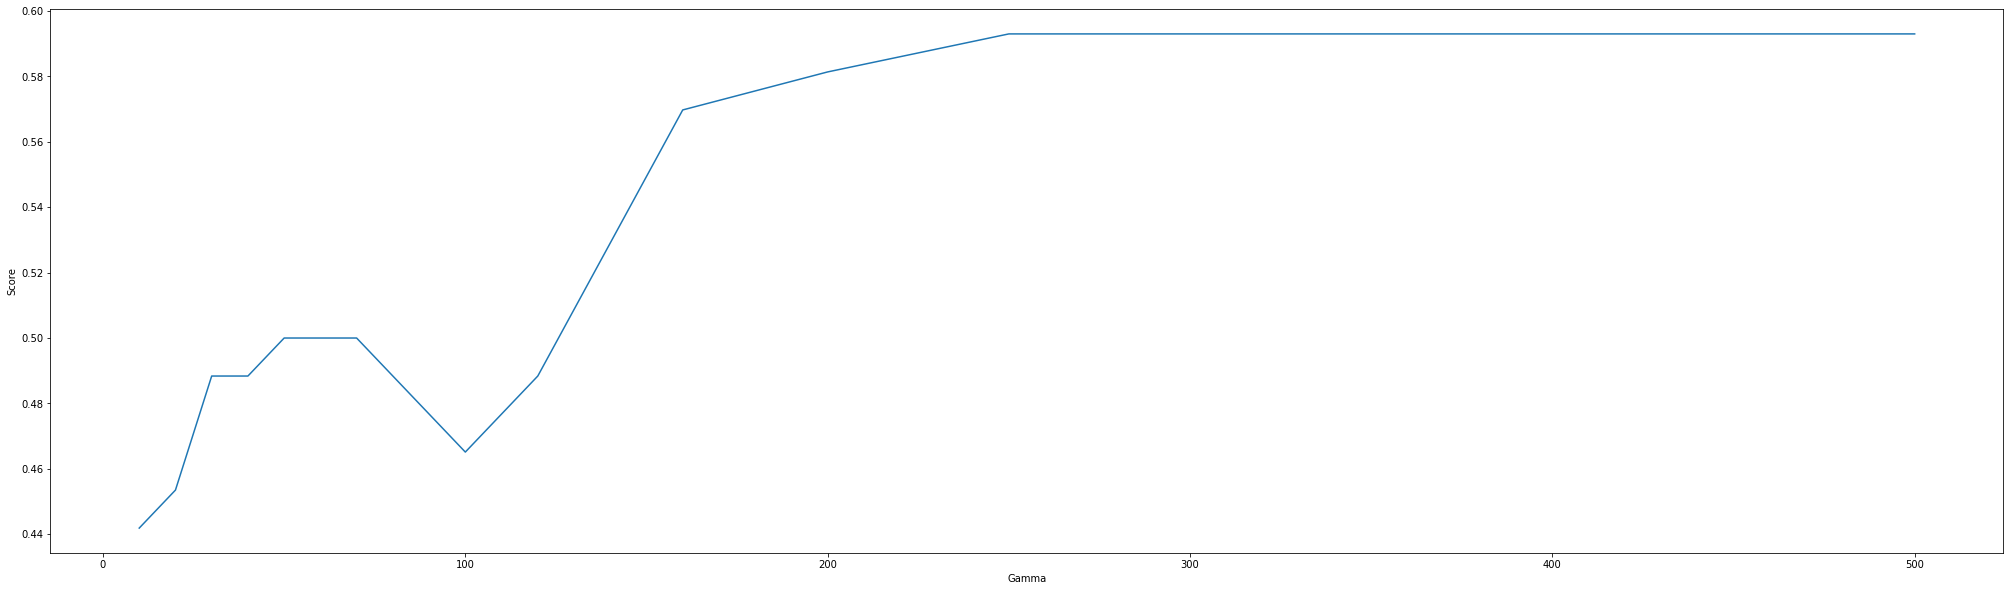

In [41]:
from sklearn.svm import SVC
params = [10,20,30,40,50,70,100,120,160,200,250,300,500]
test_scores = []
for param in params:
    clf = SVC(gamma = param)
    clf.fit(X_train_V, y_train, sample_weight = None)
    clf.predict(X_test_V)
    test_scores.append(clf.score(X_test_V, y_test))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(35, 10))
plt.plot(params, test_scores)
plt.xlabel("Gamma")
plt.ylabel("Score")

In [42]:
from sklearn.svm import SVC

clf2 = SVC(gamma = 300,kernel = 'rbf')
clf2.fit(X_train_V,y_train)
clf2.predict(X_test_V)
clf2.score(X_test_V,y_test)


0.5930232558139535